In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from pathlib import Path

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = [
    "Arial",
    "DejaVu Sans",
    "Liberation Sans",
    "Helvetica",
]
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

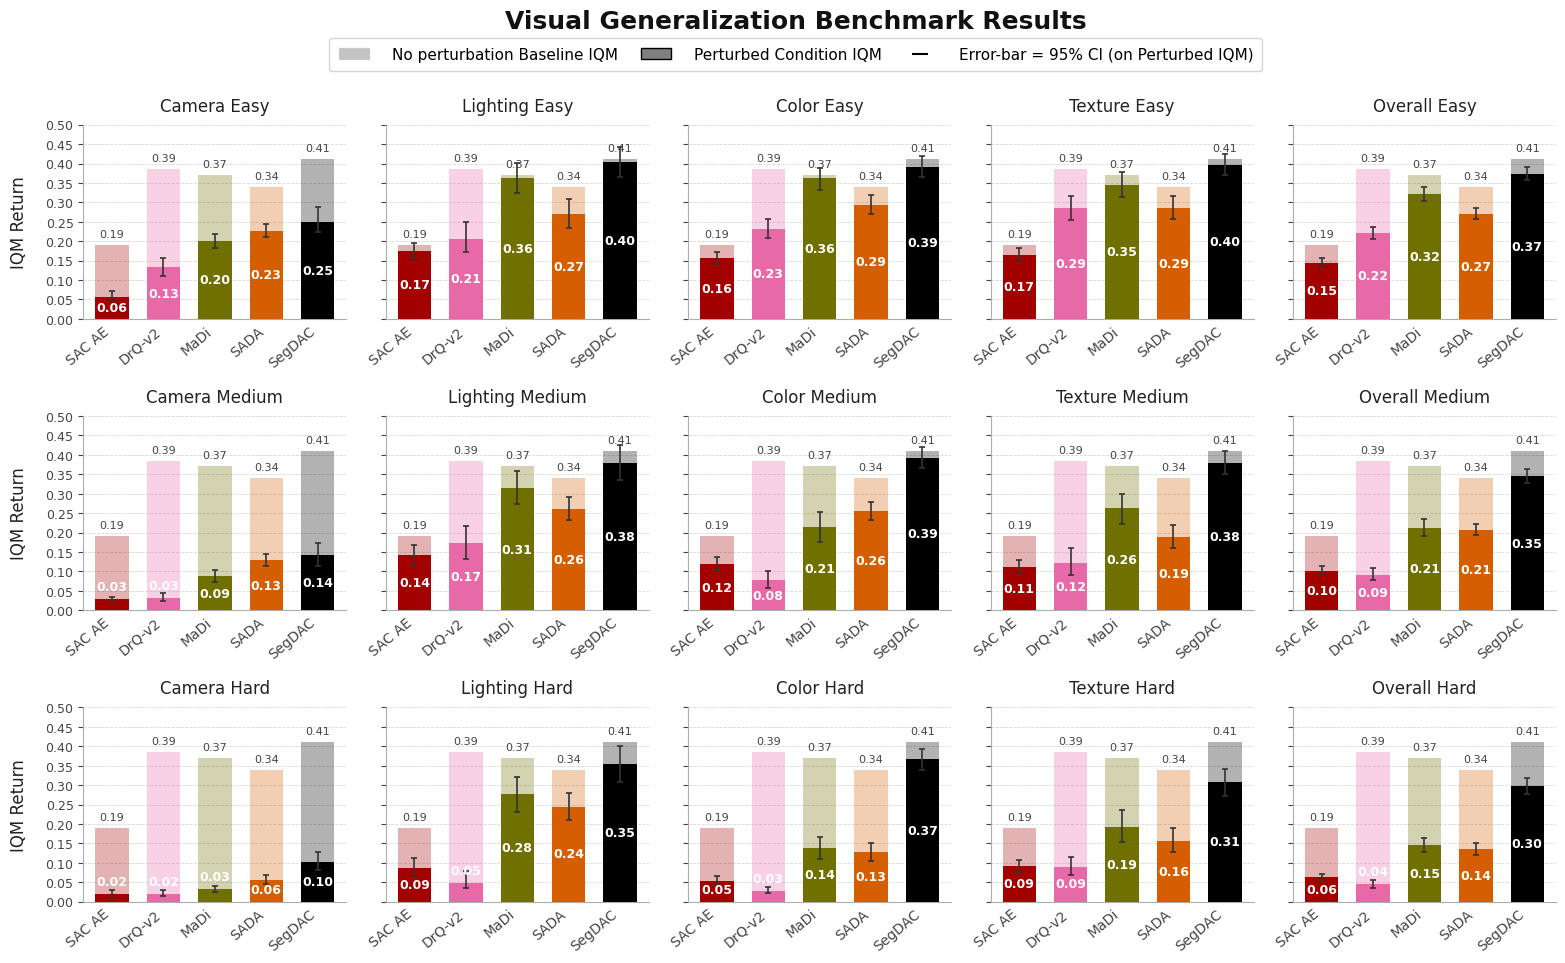

In [6]:
METRIC_NAME = "return"

data = {}

with open("results/test/drqv2_final_aggregated_scores-0.json", "r") as f:
    drqv2_data_content = json.load(f)
data["drqv2"] = drqv2_data_content["drqv2"]
with open(
    "results/test/segdac_sac_sam_enc_decoder_q_cond_final_aggregated_scores-0.json", "r"
) as f:
    segdac_data_content = json.load(f)
data["segdac"] = segdac_data_content["segdac_sac_sam_enc_decoder_q_cond"]
# with open(
#     "results/test/segdac_decoder_q_value_change_aux_critic_final_aggregated_scores-0.json", "r"
# ) as f:
#     segdac_q_value_change_critic_aux_data_content = json.load(f)
# data["segdac_q_value_change_critic_aux"] = segdac_q_value_change_critic_aux_data_content["segdac_decoder_q_value_change_aux_critic"]
# with open('results/test/segdac_sac_sam_enc_decoder_q_cond_final_no_bg_aggregated_scores-0.json', 'r') as f:
#     segdac_test_no_bg_data_content = json.load(f)
# data['segdac_test_no_bg'] = segdac_test_no_bg_data_content['segdac_sac_sam_enc_decoder_q_cond']
# with open('results/test/segdac_sac_sam_enc_decoder_q_cond_no_bg_final_aggregated_scores-0.json', 'r') as f:
#     segdac_no_bg_data_content = json.load(f)
# data['segdac_no_bg'] = segdac_no_bg_data_content['segdac_sac_sam_enc_decoder_q_cond']
with open("results/test/sac_ae_final_aggregated_scores-0.json", "r") as f:
    sac_ae_data_content = json.load(f)
data["sac_ae"] = sac_ae_data_content["sac_ae"]
with open("results/test/madi_final_aggregated_scores-0.json", "r") as f:
    madi_data_content = json.load(f)
data["madi"] = madi_data_content["madi"]

with open("results/test/sada_final_aggregated_scores-0.json", "r") as f:
    sada_data_content = json.load(f)
data["sada"] = sada_data_content["sada"]

algorithm_plot_config = [
    {"display": "SAC AE", "key": "sac_ae", "color": "#A30000"},
    {"display": "DrQ-v2", "key": "drqv2", "color": "#e869a7"},
    {"display": "MaDi", "key": "madi", "color": "#707000"},
    {"display": "SADA", "key": "sada", "color": "#D55E00"},
    # {"display": "SegDAC + aux", "key": "segdac_q_value_change_critic_aux", "color": "#0072B2"},
    {"display": "SegDAC", "key": "segdac", "color": "#000000"},
    # {'display': 'Train/Test no BG', 'key': 'segdac_no_bg', 'color': '#0072B2'},
    # {'display': 'Test no BG', 'key': 'segdac_test_no_bg', 'color': '#0072B2'},
    # {"display": "Train/Test BG", "key": "segdac", "color": "#000000"},
]

difficulty_plot_config = [
    {"display": "Easy", "key": "easy"},
    {"display": "Medium", "key": "medium"},
    {"display": "Hard", "key": "hard"},
]
condition_plot_config = [
    {"display": "Camera", "key": "camera"},
    {"display": "Lighting", "key": "lighting"},
    {"display": "Color", "key": "color"},
    {"display": "Texture", "key": "texture"},
    {"display": "Overall", "key": "overall"},
]

active_algorithm_plot_config = algorithm_plot_config

algorithm_display_names = [alg["display"] for alg in active_algorithm_plot_config]
bar_colors_ordered = [alg["color"] for alg in active_algorithm_plot_config]
algorithms_x_pos = np.arange(len(algorithm_display_names))

fig, axes = plt.subplots(
    len(difficulty_plot_config),
    len(condition_plot_config),
    figsize=(19, 10.5),
    sharey=True,
)

if len(difficulty_plot_config) == 1 and len(condition_plot_config) == 1:
    axes = np.array([[axes]])
elif len(difficulty_plot_config) == 1:
    axes = axes.reshape(1, -1)
elif len(condition_plot_config) == 1:
    axes = axes.reshape(-1, 1)

fig.subplots_adjust(wspace=0.15, hspace=0.5, top=0.85)

y_ticks = np.arange(0, 0.55, 0.05)
bar_width = 0.65

error_bar_style = {
    "ecolor": "#333333",
    "elinewidth": 1.2,
    "capsize": 2.5,
    "capthick": 1.2,
}

for i, difficulty_config in enumerate(difficulty_plot_config):
    difficulty_name = difficulty_config["display"]
    difficulty_key = difficulty_config["key"]

    for j, condition_config in enumerate(condition_plot_config):
        condition_name = condition_config["display"]
        condition_key = condition_config["key"]
        ax = axes[i, j]

        current_perturbed_means = []
        perturbed_errors_below_list = []
        perturbed_errors_above_list = []
        baseline_means = []

        for algo_index, algo_config in enumerate(active_algorithm_plot_config):
            algo_key = algo_config["key"]

            baseline_mean_val = data[algo_key]["no_perturb"]["overall"][METRIC_NAME][
                "iqm"
            ][0]
            baseline_means.append(baseline_mean_val)

            perturb_data_dict = data[algo_key]["perturb_per_diff_per_cat"][
                difficulty_key
            ][condition_key][METRIC_NAME]
            perturbed_mean_val = perturb_data_dict["iqm"][0]
            ci_low = perturb_data_dict["ci"][0][0]
            ci_high = perturb_data_dict["ci"][1][0]

            current_perturbed_means.append(perturbed_mean_val)
            perturbed_errors_below_list.append(perturbed_mean_val - ci_low)
            perturbed_errors_above_list.append(ci_high - perturbed_mean_val)

        current_perturbed_yerr = [
            perturbed_errors_below_list,
            perturbed_errors_above_list,
        ]

        ax.bar(
            algorithms_x_pos,
            baseline_means,
            color=bar_colors_ordered,
            width=bar_width,
            alpha=0.3,
            zorder=2,
        )

        bars_perturbed = ax.bar(
            algorithms_x_pos,
            current_perturbed_means,
            yerr=current_perturbed_yerr,
            color=bar_colors_ordered,
            width=bar_width,
            error_kw=error_bar_style,
            zorder=3,
        )

        for algo_index, algo_plot_config in enumerate(active_algorithm_plot_config):
            algo_x_position = algorithms_x_pos[algo_index]

            perturbed_val = current_perturbed_means[algo_index]
            perturbed_text_content = f"{perturbed_val:.2f}"
            y_pos_perturbed_text = max(perturbed_val / 2, 0.03)
            va_perturbed = "center"
            if perturbed_val < 0.05:
                y_pos_perturbed_text = (
                    perturbed_val + 0.015 if perturbed_val > 0 else 0.015
                )  # Place above very small bars
                va_perturbed = "bottom"

            ax.text(
                algo_x_position,
                y_pos_perturbed_text,
                perturbed_text_content,
                ha="center",
                va=va_perturbed,
                fontsize=9.0,
                color="white",
                fontweight="bold",
                zorder=4,
            )

            baseline_val = baseline_means[algo_index]
            baseline_text_content = f"{baseline_val:.2f}"
            offset_above_baseline = (
                0.015  # How much above the bar top to place the text
            )

            y_pos_baseline_text = baseline_val + offset_above_baseline
            if baseline_val < 0.005:  # If baseline is essentially 0
                y_pos_baseline_text = offset_above_baseline

            ax.text(
                algo_x_position,
                y_pos_baseline_text,
                baseline_text_content,
                ha="center",
                va="bottom",
                fontsize=8,
                color="#444444",
                zorder=5,
            )

        ax.set_title(
            f'{condition_config["display"]} {difficulty_config["display"]}',
            fontsize=12,
            color="#222222",
            pad=10,
        )
        ax.set_ylim(0, 0.5)
        ax.set_yticks(y_ticks)

        ax.set_xticks(algorithms_x_pos)
        ax.set_xticklabels(
            algorithm_display_names,
            rotation=40,
            ha="right",
            fontsize=10,
            color="#444444",
        )
        ax.tick_params(axis="x", which="major", length=0)
        ax.tick_params(axis="y", colors="#444444", labelsize=9)

        if j == 0:
            ax.set_ylabel("IQM Return", fontsize=12, color="#222222", labelpad=12)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#ADADAD")
        ax.spines["bottom"].set_color("#ADADAD")

        ax.grid(axis="y", linestyle="--", color="#D8D8D8", linewidth=0.6, zorder=0)
        ax.set_axisbelow(True)

faded_bar_handle = mpatches.Patch(
    facecolor="dimgray",
    alpha=0.4,
    edgecolor="darkgray",
    label="No perturbation Baseline IQM",
)
perturbed_bar_handle = mpatches.Patch(
    facecolor="gray", edgecolor="black", label="Perturbed Condition IQM"
)
ci_handle = Line2D(
    [],
    [],
    color="black",
    marker="_",
    linestyle="None",
    markersize=12,
    markeredgewidth=1.5,
    label="Error-bar = 95% CI (on Perturbed IQM)",
)

fig.legend(
    handles=[faded_bar_handle, perturbed_bar_handle, ci_handle],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.94), # Place just below the suptitle (which is at y=0.96)
    fontsize=11,
    frameon=True,
    borderpad=0.6,
    ncol=3,
    handletextpad=1.5,
    columnspacing=1.5,
)

fig.suptitle(
    "Visual Generalization Benchmark Results",
    fontsize=18,
    color="#111111",
    y=0.96,
    weight="bold",
)

plt.show()

output_folder = Path("results/test/plots")
output_folder.mkdir(parents=True, exist_ok=True)
fig.savefig(str(output_folder / "visual_generalization_plots.pdf"),
            format="pdf",
            bbox_inches="tight",
            dpi=300) 